In [65]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [66]:
import pandas as pd
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [73]:
data_df = pd.read_csv("top2.csv",index_col=0, parse_dates=True)
data_df = data_df[data_df["change"] < 1.22]
len(data_df)

44147

In [74]:
data_df.tail(3)

,change,date,stock,close0,high0,high_limit0,low0,open0,volume0,day0,...,open3,volume3,day3,minute_low,minute_volume,minute,recent,circap,isnew,capq
603999.XSHG_2016-01-06,1.000000,2016-01-06 00:00:00,603999.XSHG,63.14,64.68,64.68,55.11,56.77,39777626.0,16.0,...,76.40,10308607.0,19.0,55.56,27242426.0,10:51:00,2.0,932.5,1.0,0.282747
603999.XSHG_2016-10-11,0.991956,2016-10-11 00:00:00,603999.XSHG,32.87,33.25,35.44,32.28,32.28,7297453.0,199.0,...,39.46,22979085.0,202.0,35.62,19847200.0,13:28:00,2.0,384.0,0.0,0.116434
603999.XSHG_2016-10-12,0.989488,2016-10-12 00:00:00,603999.XSHG,36.16,36.16,36.16,32.74,33.04,12862681.0,200.0,...,43.30,20111281.0,203.0,38.93,14319600.0,11:27:00,3.0,472.5,0.0,0.143269


In [75]:
len(data_df[notyz1 & notyz2])

30732

In [82]:
is_new

000001.XSHE_2007-01-12    False
000001.XSHE_2007-01-15    False
000001.XSHE_2007-01-16    False
000001.XSHE_2007-01-22    False
000001.XSHE_2007-01-29    False
000001.XSHE_2007-01-30    False
000001.XSHE_2007-02-07    False
000001.XSHE_2007-02-08    False
000001.XSHE_2007-03-22    False
000001.XSHE_2007-04-12    False
000001.XSHE_2007-04-13    False
000001.XSHE_2007-04-26    False
000001.XSHE_2007-05-08    False
000001.XSHE_2008-09-22    False
000002.XSHE_2007-05-09    False
000002.XSHE_2008-04-25    False
000002.XSHE_2008-09-22    False
000002.XSHE_2008-09-26    False
000002.XSHE_2015-01-05    False
000002.XSHE_2015-12-02    False
000002.XSHE_2015-12-18    False
000002.XSHE_2016-08-15    False
000002.XSHE_2016-08-16    False
000004.XSHE_2007-01-12    False
000004.XSHE_2007-01-15    False
000004.XSHE_2007-02-26    False
000004.XSHE_2007-02-27    False
000004.XSHE_2007-02-28    False
000004.XSHE_2007-03-01    False
000004.XSHE_2007-03-02    False
                          ...  
603997.X

In [80]:
is_new = data_df["isnew"] == 1
small_capq = data_df["capq"] < 0.5
small_cap = data_df["circap"] < 200
print len(data_df[minute & notyz1 & notyz2]),len(data_df[~minute & notyz1 & notyz2])
print len(data_df[volume & notyz1 & notyz2]),len(data_df[~volume & notyz1 & notyz2])
print len(data_df[is_new & notyz1 & notyz2]),len(data_df[~is_new & notyz1 & notyz2])
print len(data_df[small_capq & notyz1 & notyz2]),len(data_df[~small_capq & notyz1 & notyz2])
print len(data_df[small_cap & notyz1 & notyz2]),len(data_df[~small_cap & notyz1 & notyz2])

21704 9028
13846 16886
1001 29731
24758 5974
3963 26769


In [69]:
def low(day):
    return "minute_low" if day == 2 else "low" + str(day)
def yz(day):
    return (data_df[low(day)] == data_df["high_limit" + str(day)])
def notyz(day):
    return (data_df[low(day)] < data_df["high_limit" + str(day)])
def top(day):
    return (data_df["close" + str(day)] == data_df["high_limit" + str(day)])
def nottop(day):
    return (data_df["close" + str(day)] < data_df["high_limit" + str(day)])
def opentop(day):
    return (data_df["open" + str(day)] == data_df["high_limit" + str(day)])
#前天/昨天/今天开盘涨停
opentop0 = opentop(0)
opentop1 = opentop(1)
opentop2 = opentop(2)
# 前天/昨天/今天是/不是一字板
yz0 = yz(0)
yz1 = yz(1)
notyz0 = notyz(0)
notyz1 = notyz(1)
notyz2 = notyz(2)
# 前天/昨天是/否涨停
top0 = top(0)
top1 = top(1)
nottop0 = nottop(0)
nottop1 = nottop(1)
def jump(day):
    return (data_df[low(day)] > data_df["high" + str(day - 1)]) 
def foot(day,degree = 1.0):
    return (data_df[low(day)] >= data_df["open" + str(day)] * degree)
# 昨天/今天 跳高
jump1 = jump(1)
jump2 = jump(2)
# 前天/昨天/今天 光脚
foot0 = foot(0,0.995)
foot1 = foot(1,0.995)
foot2 = foot(2,0.995)
def speedup(day):
    return (data_df["high" + str(day)] - data_df[low(day)] < data_df["high" + str(day - 1)] - data_df[low(day - 1)])

#昨天/今天 加速
speedup1 = speedup(1)
speedup2 = speedup(2)


def recent(day):
    return (data_df["recent"] == day)
recent5 = recent(5)
recent4 = recent(4)
recent3 = recent(3)


minute = (data_df["minute"] < "11:00:00")
volume = (data_df["minute_volume"] < data_df["volume1"] * 0.5)
volume2 = (data_df["minute_volume"] < data_df["volume1"] * 0.7)

In [49]:
def result(valid_data_df):
    result_df = pd.DataFrame()
    result_df["mean"] = valid_data_df.groupby(["recent"]).change.mean()
    result_df["count"] = valid_data_df.groupby(["recent"]).change.count()
    result_df = result_df[result_df["count"] > 5]
    print result_df
    win_df = valid_data_df[valid_data_df["change"] > 1.0]
    win_ratio = float(len(win_df))/len(valid_data_df)
    print win_ratio,len(valid_data_df),valid_data_df.change.mean()
    valid_data_df = valid_data_df.sort_index()
    value_se = valid_data_df.change.cumprod()
    print value_se.plot(figsize=(7,4))

In [42]:
filter1 = notyz1 & yz0 & jump1 & minute & volume & recent3 & notyz2 & ~foot1 & volume2
filter2 = notyz1 & yz0 & jump1 & minute & volume & recent3 & notyz2 & ~foot1
#filter2 = notyz1 & yz0 & jump1 & minute & volume & recent3 & notyz2

            mean  count
recent                 
3.0     1.044964     51
0.745098039216 51 1.04496404805
Axes(0.125,0.125;0.775x0.755)


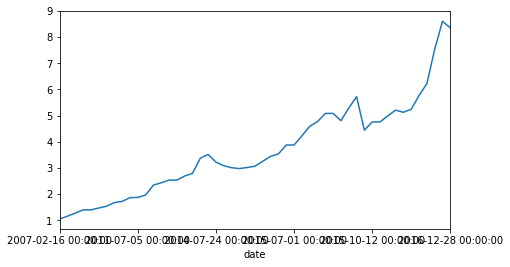

In [43]:
valid_df = data_df[filter1]
valid_df = valid_df.sort_values("minute")
valid_df = valid_df.groupby("date").first()
result(valid_df)

            mean  count
recent                 
3.0     1.040093     69
0.710144927536 69 1.04009348911
Axes(0.125,0.125;0.775x0.755)


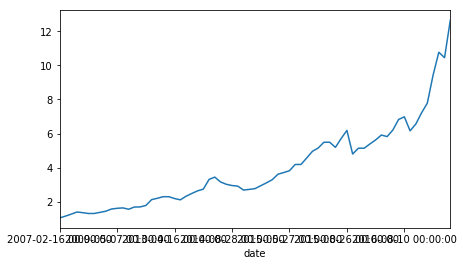

In [44]:
valid_df = data_df[filter2]
valid_df = valid_df.sort_values("minute")
valid_df = valid_df.groupby("date").first()
result(valid_df)

In [96]:
valid_df = valid_df[valid_df["recent"] == 5.0]
valid_df.sort()

/Users/sgcy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,change,stock,close0,high0,high_limit0,low0,open0,volume0,day0,close1,...,high3,high_limit3,low3,open3,volume3,day3,recent,minute_low,minute_volume,minute
date,,,,,,,,,,,,,,,,,,,,,
2007-04-17 00:00:00,2.421053,000732.XSHE,3.10,3.10,3.10,3.00,3.10,16760311.0,66.0,3.26,...,12.42,1.073742e+09,8.28,8.28,67568960.0,69.0,5.0,3.36,0.0,09:30:00
2007-05-15 00:00:00,1.030623,000820.XSHE,8.59,8.59,8.59,8.26,8.59,17536038.0,80.0,9.02,...,9.76,9.940000e+00,9.00,9.76,12565795.0,83.0,5.0,9.18,6783000.0,11:02:00
2007-05-18 00:00:00,1.209699,600848.XSHG,12.10,12.10,12.10,11.38,12.10,6241057.0,81.0,13.31,...,16.10,1.610000e+01,16.10,16.10,1142958.0,84.0,5.0,14.31,748100.0,09:32:00
2007-08-15 00:00:00,0.899514,600714.XSHG,11.19,11.19,11.19,10.81,11.19,1879408.0,143.0,11.75,...,11.87,1.187000e+01,10.87,11.10,3307820.0,146.0,5.0,12.30,0.0,09:30:00
2008-04-11 00:00:00,1.049656,000605.XSHE,11.88,11.88,11.88,11.75,11.88,2187882.0,87.0,12.47,...,13.74,1.374000e+01,13.20,13.74,3331797.0,90.0,5.0,12.86,192600.0,09:34:00
2008-05-06 00:00:00,1.042403,600076.XSHG,5.13,5.13,5.13,5.01,5.13,1479603.0,311.0,5.39,...,5.94,5.940000e+00,5.81,5.90,1153644.0,314.0,5.0,5.48,996260.0,09:42:00
2008-12-05 00:00:00,1.044510,600679.XSHG,5.57,5.57,5.57,5.20,5.57,11556469.0,464.0,6.13,...,7.40,7.410000e+00,6.62,7.04,15893110.0,467.0,5.0,6.43,1814205.0,09:34:00
2009-07-13 00:00:00,1.019376,600773.XSHG,8.43,8.43,8.43,8.28,8.43,3833606.0,490.0,8.85,...,9.50,9.750000e+00,8.83,9.47,13681900.0,493.0,5.0,9.18,0.0,09:30:00
2009-12-10 00:00:00,1.050505,000722.XSHE,8.98,8.98,8.98,8.70,8.98,30663308.0,606.0,9.43,...,10.40,1.040000e+01,9.53,10.40,35526280.0,609.0,5.0,9.80,656300.0,10:31:00


In [98]:
invalid_df = data_df[data_df["change"] > 1.22]
invalid_df

,change,date,stock,close0,high0,high_limit0,low0,open0,volume0,day0,...,high3,high_limit3,low3,open3,volume3,day3,recent,minute_low,minute_volume,minute
000017.XSHE_2007-01-26,2.240688,2007-01-26 00:00:00,000017.XSHE,3.16,3.16,3.16,3.16,3.16,441999.0,2.0,...,9.20,1.073742e+09,7.30,7.82,57641636.0,5.0,5.0,2.09,11688044.0,14:16:00
000301.XSHE_2007-05-23,1.303681,2007-05-23 00:00:00,000301.XSHE,10.77,10.77,10.77,9.30,9.39,64881300.0,86.0,...,21.99,1.073742e+09,16.50,17.00,119938770.0,89.0,3.0,10.41,67518812.0,13:11:00
000506.XSHE_2007-04-20,1.936937,2007-04-20 00:00:00,000506.XSHE,4.03,4.03,4.03,3.84,4.03,19499177.0,68.0,...,10.87,1.073742e+09,8.31,8.60,98647264.0,71.0,6.0,2.60,9066957.0,09:49:00
000540.XSHE_2007-02-12,2.247557,2007-02-12 00:00:00,000540.XSHE,5.57,5.57,5.57,5.51,5.57,5490231.0,25.0,...,13.90,1.073742e+09,11.01,13.80,23886525.0,28.0,4.0,0.58,21221449.0,10:01:00
000582.XSHE_2007-03-16,1.439114,2007-03-16 00:00:00,000582.XSHE,12.29,12.29,12.29,11.80,12.29,1784701.0,42.0,...,19.51,1.073742e+09,15.28,19.50,20282535.0,45.0,10.0,9.64,0.0,09:30:00
000728.XSHE_2007-03-26,3.742515,2007-03-26 00:00:00,000728.XSHE,12.11,12.11,12.11,12.11,12.11,53491.0,3.0,...,50.00,1.073742e+09,45.01,50.00,21586515.0,6.0,6.0,NaN,NaN,NaN
000732.XSHE_2007-04-17,2.421053,2007-04-17 00:00:00,000732.XSHE,3.10,3.10,3.10,3.00,3.10,16760311.0,66.0,...,12.42,1.073742e+09,8.28,8.28,67568960.0,69.0,5.0,3.36,0.0,09:30:00
000783.XSHE_2007-02-07,3.722163,2007-02-07 00:00:00,000783.XSHE,8.55,8.55,8.55,8.55,8.55,217800.0,1.0,...,9.90,9.900000e+00,9.90,9.90,407446.0,4.0,4.0,NaN,NaN,NaN
000783.XSHE_2007-02-08,3.545455,2007-02-08 00:00:00,000783.XSHE,8.98,8.98,8.98,8.98,8.98,139051.0,2.0,...,42.44,1.073742e+09,35.10,35.10,89135769.0,5.0,5.0,NaN,NaN,NaN
000965.XSHE_2007-05-17,1.313655,2007-05-17 00:00:00,000965.XSHE,17.67,17.67,17.67,17.67,17.67,190480.0,64.0,...,26.00,1.073742e+09,19.45,25.59,13440724.0,67.0,4.0,8.55,0.0,09:30:00
